<a href="https://colab.research.google.com/github/thorat1607/thorat1607/blob/OIBSIP/Task2_OIBSIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3> UNEMPLOYMENT ANALYSIS WITH PYTHON

Import Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
import plotly.express as px

Import Data

In [2]:
df = pd.read_csv("/content/Unemployment_Rate_upto_11_2020[1].csv")

Rename Columns

In [3]:
df.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate",
               "Estimated Employed",
               "Estimated Labour Participation Rate",
               "Region","longitude","latitude"]

In [4]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [6]:
df.shape

(267, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [9]:
round(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.0,11.0,0.0,5.0,10.0,17.0,76.0
Estimated Employed,267.0,13962106.0,13366318.0,117542.0,2838930.0,9732417.0,21878686.0,59433759.0
Estimated Labour Participation Rate,267.0,42.0,8.0,17.0,37.0,40.0,44.0,70.0
longitude,267.0,23.0,6.0,11.0,18.0,24.0,27.0,34.0
latitude,267.0,81.0,6.0,71.0,76.0,79.0,85.0,93.0


<h3> Average unemployement rate of India is 12%

In [10]:
df.isnull().sum()

States                                 0
Date                                   0
Frequency                              0
Estimated Unemployment Rate            0
Estimated Employed                     0
Estimated Labour Participation Rate    0
Region                                 0
longitude                              0
latitude                               0
dtype: int64

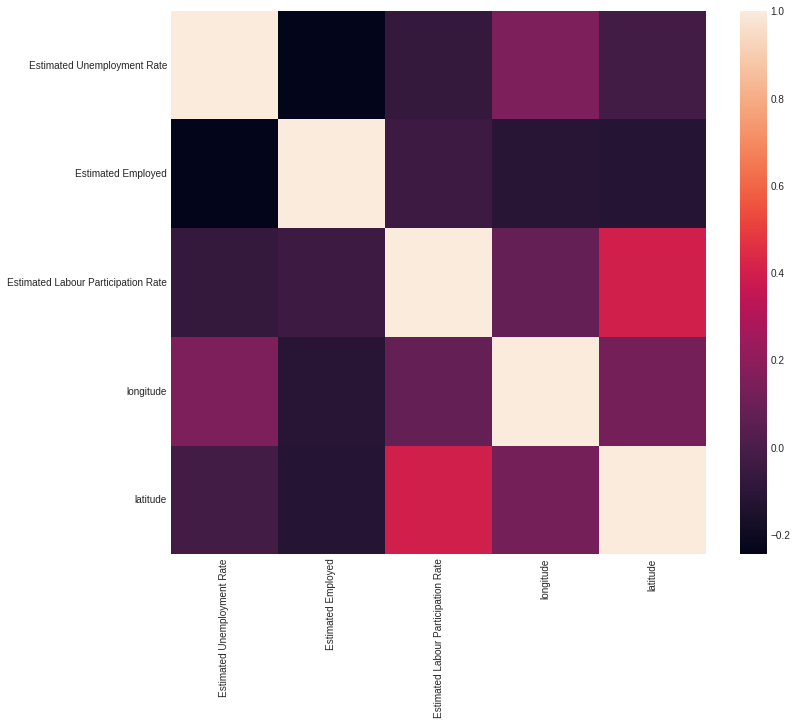

In [12]:
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())
plt.show()

<h3>Month wise Unemployment Rate per State

In [19]:
import calendar
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Month_int'] = df['Date'].dt.month
df['Month'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])
df.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [21]:
IND = df.groupby(['Month'])[['Estimated Unemployment Rate', "Estimated Employed", "Estimated Labour Participation Rate"]].mean()
IND= pd.DataFrame(IND).reset_index()

<h3>Bar Graph Of Unemployment Rate and Labour Partcipation Rate

In [36]:
import calendar
month = IND.Month
unemployment_rate = IND["Estimated Unemployment Rate"]
labour_participation_rate = IND["Estimated Labour Participation Rate"]

fig = go.Figure()

fig.add_trace(go.Bar(x = month, y = unemployment_rate, name = "Unemployment Rate"))
fig.add_trace(go.Bar(x = month, y = labour_participation_rate, name = "Labour Participation Rate"))

fig.update_layout(title = "Unemployment Rate and Labour Participation Rate", 
                        xaxis = {"categoryorder":"array", "categoryarray":["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"
                                                                            "Aug", "Sep", "Oct"]})
fig.show()

<h3>Bar Graph of Employed citizens in every month

In [39]:
fig = px.bar(IND, x='Month', y = 'Estimated Employed', color = 'Month',
             category_orders = {"month" : ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct"]},
             title = "Estimated Employee from Jan 2020 to Oct 2020")
fig.show()

<h3>Mnthly Unemployed Rate

In [42]:
fig = px.scatter_geo(df, 'longitude', 'latitude', color="States",
                     hover_name='States', size= 'Estimated Unemployment Rate', 
                     animation_frame = 'Month', scope='asia', title="Impact of Lockdown on Employement of India")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000

fig.update_geos(lataxis_range=[5,40], lonaxis_range=[65,100], oceancolor="blue", showocean=True)
fig.show()

<h3>Regional Analysis

In [44]:
df.Region.unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [45]:
fig = px.scatter_matrix(df, dimensions=['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']
, color='Region')
fig.show()

In [49]:
unemployment = df.groupby(['Region', 'States'])['Estimated Unemployment Rate'].mean().reset_index()
unemployment.head()

,Region,States,Estimated Unemployment Rate
0,East,Bihar,19.471
1,East,Jharkhand,19.539
2,East,Odisha,6.462
3,East,West Bengal,10.192
4,North,Delhi,18.414


In [51]:
fig = px.sunburst(unemployment, path=['Region', 'States'], values='Estimated Unemployment Rate', 
                 title = 'Unemployment Rate in every State and Region', height=650)
fig.show()


Unemployment Rate Before And After Lockdown

In [54]:
before_lockdown = df[(df['Month_int'] >= 1) & (df['Month_int'] < 4)]
after_lockdown = df[(df['Month_int']>= 4) & (df['Month_int'] <=6)]

af_lockdown = after_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

lockdown = before_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
lockdown['Unemployment Rate After Lockdown'] = af_lockdown['Estimated Unemployment Rate']

lockdown.columns = ['States', 'Unemployment Rate Before Lockdown', 'Unemployment Rate After Lockdown']
lockdown.head()

,States,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,5.700000,13.750000
1,Assam,4.613333,7.070000
2,Bihar,12.110000,36.806667
3,Chhattisgarh,8.523333,9.380000
4,Delhi,18.036667,25.713333


In [56]:
lockdown['Rate Change in Unemplyment'] = round(lockdown['Unemployment Rate After Lockdown']- lockdown['Unemployment Rate Before Lockdown']
                                               /lockdown['Unemployment Rate Before Lockdown'],2)


In [58]:
fig = px.bar(lockdown, x = 'States', y = 'Rate Change in Unemplyment', color = 'Rate Change in Unemplyment',
           title='Percentage Change in Unemployment Rate in each after Lockdown', template = "ggplot2")
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()